Results from replication of ITU study on breastdata

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
current_directory = os.environ['HOME']

In [2]:
#Traning setup:
image_size = 256 # https://pubs.rsna.org/doi/pdf/10.1148/ryai.210315
num_epoches = 200 #With early stopping. ITU
batch_size = 16 #Breast = 16 jf. artikelen fra ITU: https://arxiv.org/pdf/2302.08272.pdf
lr = 0.00001 #ITU = fixed 1e-5    vs  mei = varierende
structure = 'freezeall'
#fivefold cross-validation
#train/val/test splits: (80%, 5%, 15%). jf. ITU

Training summary:

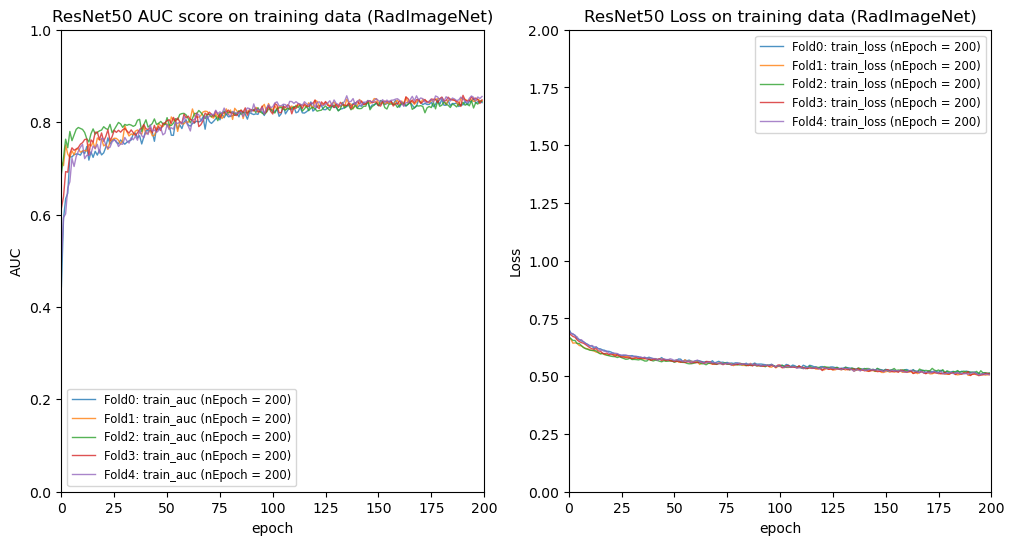

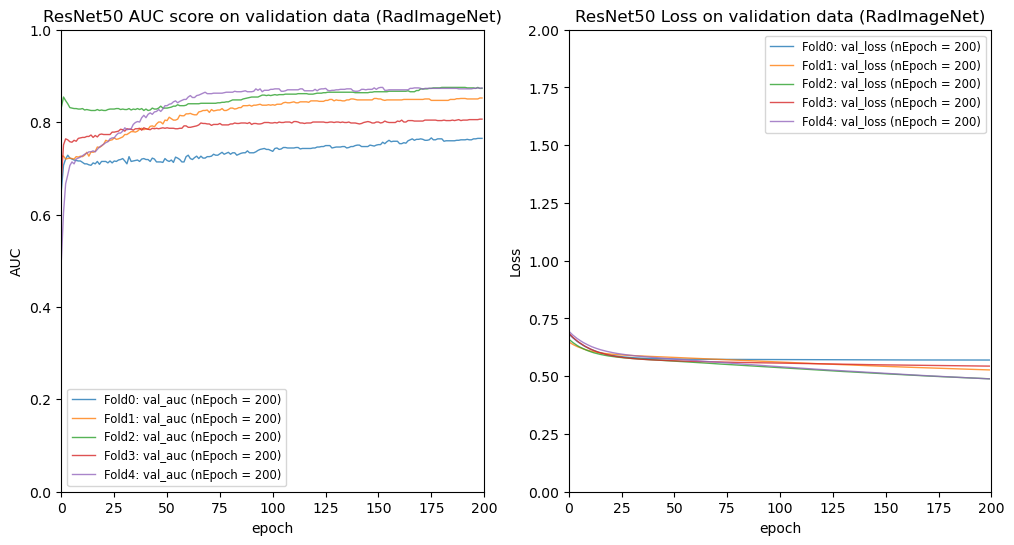

In [3]:
#RadImageNet
train_aucs = []
train_losses = []
val_aucs = []
val_losses = []
for i in range (5):
    RadImgNetLoss_path = os.path.join(current_directory,"radimagenet/WorkspaceV2/Replication_ITU_study/pretrained_RadImageNet/training_history/breast-freezeall-fold"+str(i+1)+"-RadImageNet-ResNet50_repli_RadImgNet-256-16-1e-05.csv")
    RadImgNetLoss_df = pd.read_csv(RadImgNetLoss_path)
    val_aucs.append(np.array(RadImgNetLoss_df['val_auc']))
    train_aucs.append(np.array(RadImgNetLoss_df['train_auc']))
    val_losses.append(RadImgNetLoss_df['val_loss'])
    train_losses.append(RadImgNetLoss_df['train_loss'])

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i in range(5):
        epochs_len = len(train_aucs[i])
        ax1.plot(
            train_aucs[i],
            #color="b",
            label=r"Fold%i: %s (nEpoch = %i)" % (i, "train_auc", epochs_len),
            lw=1,
            alpha=0.8,
        )
ax1.set(
        xlim=(0,200),
        ylim=(0,1),
        xlabel = 'epoch',
        ylabel = 'AUC',
        title = 'ResNet50 AUC score on training data (RadImageNet)',
    )
ax1.legend(loc="best",fontsize='small')

for i in range(5):
        epochs_len = len(train_losses[i])
        ax2.plot(
            train_losses[i],
            #color="b",
            label=r"Fold%i: %s (nEpoch = %i)" % (i, "train_loss", epochs_len),
            lw=1,
            alpha=0.8,
        )
ax2.set(
        xlim=(0,200),
        ylim=(0, 2),
        xlabel = 'epoch',
        ylabel = 'Loss',
        title = 'ResNet50 Loss on training data (RadImageNet)',
    )
ax2.legend(loc="best",fontsize='small')
plt.show()

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for i in range(5):
        epochs_len = len(val_aucs[i])
        ax1.plot(
            val_aucs[i],
            #color="b",
            label=r"Fold%i: %s (nEpoch = %i)" % (i, "val_auc", epochs_len),
            lw=1,
            alpha=0.8,
        )
ax1.set(
        xlim=(0,200),
        ylim=(0, 1),
        xlabel = 'epoch',
        ylabel = 'AUC',
        title = 'ResNet50 AUC score on validation data (RadImageNet)',
    )
ax1.legend(loc="best",fontsize='small')

for i in range(5):
        epochs_len = len(val_losses[i])
        ax2.plot(
            val_losses[i],
            #color="b",
            label=r"Fold%i: %s (nEpoch = %i)" % (i, "val_loss", epochs_len),
            lw=1,
            alpha=0.8,
        )
ax2.set(
        xlim=(0,200),
        ylim=(0, 2),
        xlabel = 'epoch',
        ylabel = 'Loss',
        title = 'ResNet50 Loss on validation data (RadImageNet)',
    )
ax2.legend(loc="best",fontsize='small')
plt.show()

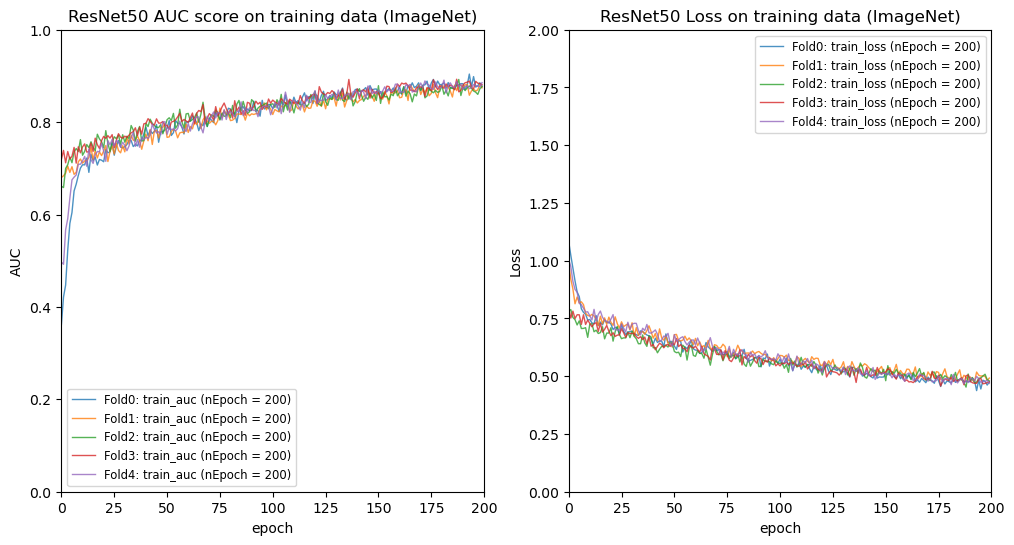

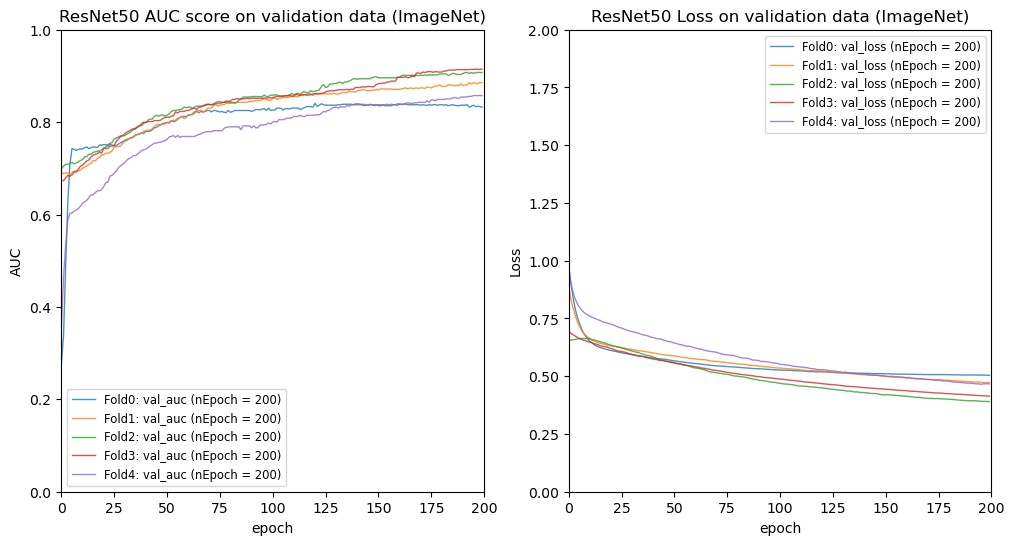

In [4]:
#ImageNet
train_aucs = []
train_losses = []
val_aucs = []
val_losses = []
for i in range (5):
    ImgNetLoss_path = os.path.join(current_directory,"radimagenet/WorkspaceV2/Replication_ITU_study/pretrained_ImageNet/training_history/breast-freezeall-fold"+str(i+1)+"-ImageNet-ResNet50_repli_ImgNet-256-16-1e-05.csv")
    ImgNetLoss_df = pd.read_csv(ImgNetLoss_path)
    val_aucs.append(np.array(ImgNetLoss_df['val_auc']))
    train_aucs.append(np.array(ImgNetLoss_df['train_auc']))
    val_losses.append(ImgNetLoss_df['val_loss'])
    train_losses.append(ImgNetLoss_df['train_loss'])

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i in range(5):
        epochs_len = len(train_aucs[i])
        ax1.plot(
            train_aucs[i],
            #color="b",
            label=r"Fold%i: %s (nEpoch = %i)" % (i, "train_auc", epochs_len),
            lw=1,
            alpha=0.8,
        )
ax1.set(
        xlim=(0,200),
        ylim=(0,1),
        xlabel = 'epoch',
        ylabel = 'AUC',
        title = 'ResNet50 AUC score on training data (ImageNet)',
    )
ax1.legend(loc="best",fontsize='small')

for i in range(5):
        epochs_len = len(train_losses[i])
        ax2.plot(
            train_losses[i],
            #color="b",
            label=r"Fold%i: %s (nEpoch = %i)" % (i, "train_loss", epochs_len),
            lw=1,
            alpha=0.8,
        )
ax2.set(
        xlim=(0,200),
        ylim=(0, 2),
        xlabel = 'epoch',
        ylabel = 'Loss',
        title = 'ResNet50 Loss on training data (ImageNet)',
    )
ax2.legend(loc="best",fontsize='small')
plt.show()

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for i in range(5):
        epochs_len = len(val_aucs[i])
        ax1.plot(
            val_aucs[i],
            #color="b",
            label=r"Fold%i: %s (nEpoch = %i)" % (i, "val_auc", epochs_len),
            lw=1,
            alpha=0.8,
        )
ax1.set(
        xlim=(0,200),
        ylim=(0, 1),
        xlabel = 'epoch',
        ylabel = 'AUC',
        title = 'ResNet50 AUC score on validation data (ImageNet)',
    )
ax1.legend(loc="best",fontsize='small')

for i in range(5):
        epochs_len = len(val_losses[i])
        ax2.plot(
            val_losses[i],
            #color="b",
            label=r"Fold%i: %s (nEpoch = %i)" % (i, "val_loss", epochs_len),
            lw=1,
            alpha=0.8,
        )
ax2.set(
        xlim=(0,200),
        ylim=(0, 2),
        xlabel = 'epoch',
        ylabel = 'Loss',
        title = 'ResNet50 Loss on validation data (ImageNet)',
    )
ax2.legend(loc="best",fontsize='small')
plt.show()

In [5]:
#Test all 5 models pretrained on RadImageNet:
model_performace = []
corrrect_list = []
aucs = []
data_generator = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)
for i in range(5): #fivefold cross-validation
    test_path = os.path.join(current_directory,"radimagenet/Workspace/Replicate_article/data/breast_splits/test_fold"+str(i+1)+".csv")
    df_test=pd.read_csv(test_path)
    test_generator = data_generator.flow_from_dataframe(
        dataframe=df_test,
        directory=current_directory,
        x_col = 'path',
        y_col = 'class',
        target_size=(image_size, image_size),
        batch_size=len(df_test),
        shuffle=False,
        seed=726,
        class_mode='categorical')
    w_path = os.path.join(current_directory,"radimagenet/WorkspaceV2/Replication_ITU_study/pretrained_RadImageNet/weights/breast_data/breast-freezeall-fold"+str(i+1)+"-RadImageNet-ResNet50_repli_RadImgNet-256-16-1e-05.h5")
    FT_model = load_model(w_path, compile=False)
    y_pred = tf.math.argmax(FT_model.predict(test_generator),1)
    predctions = tf.Variable(y_pred).numpy().tolist()
    ylabels= test_generator.classes
    correct = sum(i == j for (i,j) in zip(predctions,ylabels))
    y_probs = FT_model.predict(test_generator) #Needs to be probabilities
    # keep probabilities for the positive outcome only
    y_probs = y_probs[:, 1]
    fpr, tpr, thresholds_keras = roc_curve(ylabels,y_probs)
    _auc = auc(fpr, tpr)
    aucs.append(_auc)
    #print('Model from fold',i+1,' Correct: ', correct, ' out of ', len(ylabels), ' (', round(correct/len(ylabels)*100,3),'%)  AUC: ',round(_auc,3))
    corrrect_list.append(correct)
    model_performace.append(_auc)
    del FT_model
print('____________________________________________________________')
print('ResNet50 pretrained on RadImageNet performance on test set:')
testsize = len(ylabels)
for i in range(5):
    print(' - Fold'+str(i+1)+' model: Correct: '+str(corrrect_list[i])+'/'+str(testsize)+' ('+str(round(corrrect_list[i]/testsize*100,3))+'%)   AUC:',round(aucs[i],3))
best_model = model_performace.index(max(model_performace))+1
print('Best AUC: The model from fold'+str(best_model)+' achieved the best AUC of:',round(max(model_performace),3))
#avg_AUC = 82.8 without fold5

Found 125 validated image filenames belonging to 2 classes.


2023-10-27 11:25:34.840551: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 11:25:41.919525: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-10-27 11:25:41.931397: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2300000000 Hz


Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
____________________________________________________________
ResNet50 pretrained on RadImageNet performance on test set:
 - Fold1 model: Correct: 92/125 (73.6%)   AUC: 0.866
 - Fold2 model: Correct: 92/125 (73.6%)   AUC: 0.748
 - Fold3 model: Correct: 92/125 (73.6%)   AUC: 0.887
 - Fold4 model: Correct: 93/125 (74.4%)   AUC: 0.806
 - Fold5 model: Correct: 93/125 (74.4%)   AUC: 0.752
Best AUC: The model from fold3 achieved the best AUC of: 0.887


In [6]:
#Imagenet (fixed so rescale set to NO)
#Test all 5 models pretrained on ImageNet:
model_performace = []
corrrect_list = []
aucs = []
data_generator = ImageDataGenerator(#rescale=1./255,
                                    preprocessing_function=preprocess_input)
for i in range(5): #fivefold cross-validation
    test_path = os.path.join(current_directory,"radimagenet/Workspace/Replicate_article/data/breast_splits/test_fold"+str(i+1)+".csv")
    df_test=pd.read_csv(test_path)
    test_generator = data_generator.flow_from_dataframe(
        dataframe=df_test,
        directory=current_directory,
        x_col = 'path',
        y_col = 'class',
        target_size=(image_size, image_size),
        batch_size=len(df_test),
        shuffle=False,
        seed=726,
        class_mode='categorical')
    w_path = os.path.join(current_directory,"radimagenet/WorkspaceV2/Replication_ITU_study/pretrained_ImageNet/weights/breast_data/breast-freezeall-fold"+str(i+1)+"-ImageNet-ResNet50_repli_ImgNet-256-16-1e-05.h5")
    FT_model = load_model(w_path, compile=False)
    y_pred = tf.math.argmax(FT_model.predict(test_generator),1)
    predctions = tf.Variable(y_pred).numpy().tolist()
    ylabels= test_generator.classes
    correct = sum(i == j for (i,j) in zip(predctions,ylabels))
    y_probs = FT_model.predict(test_generator) #Needs to be probabilities
    # keep probabilities for the positive outcome only
    y_probs = y_probs[:, 1]
    fpr, tpr, thresholds_keras = roc_curve(ylabels,y_probs)
    _auc = auc(fpr, tpr)
    aucs.append(_auc)
    corrrect_list.append(correct)
    #print('Model from fold',i+1,' Correct: ', correct, ' out of ', len(ylabels), ' (', round(correct/len(ylabels)*100,3),'%)  AUC: ',round(_auc,3))
    model_performace.append(_auc)
    del FT_model
print('_________________________________________________________')
print('ResNet50 pretrained on ImageNet performance on test set:')
testsize = len(ylabels)
for i in range(5):
    print(' - Fold'+str(i+1)+' model: Correct: '+str(corrrect_list[i])+'/'+str(testsize)+' ('+str(round(corrrect_list[i]/testsize*100,3))+'%)   AUC:',round(aucs[i],3))
best_model = model_performace.index(max(model_performace))+1
print('Best AUC: The model from fold'+str(best_model)+' achieved the best AUC of:',round(max(model_performace),3))
#avg_AUC = 89.3 without fold5

Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
_________________________________________________________
ResNet50 pretrained on ImageNet performance on test set:
 - Fold1 model: Correct: 105/125 (84.0%)   AUC: 0.879
 - Fold2 model: Correct: 103/125 (82.4%)   AUC: 0.882
 - Fold3 model: Correct: 111/125 (88.8%)   AUC: 0.953
 - Fold4 model: Correct: 102/125 (81.6%)   AUC: 0.862
 - Fold5 model: Correct: 100/125 (80.0%)   AUC: 0.77
Best AUC: The model from fold3 achieved the best AUC of: 0.953


Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.


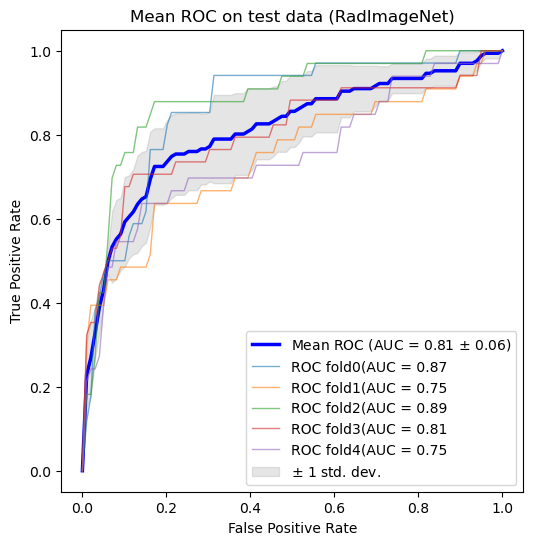

In [15]:
#database = RadImageNet
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
data_generator = ImageDataGenerator(rescale=1./255,
                                    preprocessing_function=preprocess_input)
for i in range(5): #fivefold cross-validation
    test_path = os.path.join(current_directory,"radimagenet/Workspace/Replicate_article/data/breast_splits/test_fold"+str(i+1)+".csv")
    df_test=pd.read_csv(test_path)
    test_generator = data_generator.flow_from_dataframe(
        dataframe=df_test,
        directory=current_directory,
        x_col = 'path',
        y_col = 'class',
        target_size=(image_size, image_size),
        batch_size=len(df_test),
        shuffle=False,
        seed=726,
        class_mode='categorical')
    w_path = os.path.join(current_directory,"radimagenet/WorkspaceV2/Replication_ITU_study/pretrained_RadImageNet/weights/breast_data/breast-freezeall-fold"+str(i+1)+"-RadImageNet-ResNet50_repli_RadImgNet-256-16-1e-05.h5")
    FT_model = load_model(w_path, compile=False)

    probs = FT_model.predict(test_generator)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    ylabels = test_generator.classes
    # calculate scores
    _auc = roc_auc_score(ylabels, probs)
    # calculate roc curves
    fpr, tpr, _ = roc_curve(ylabels, probs)
    del FT_model

    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(_auc)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
RadImgNet_mean_tpr = mean_tpr
mean_auc = auc(mean_fpr, mean_tpr)
RadImgNet_mean_auc = mean_auc
std_auc = np.std(aucs)
std_tpr = np.std(tprs, axis=0)
#Plot:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2.5,
    alpha=1,
)
for j in range(5):
    ax.plot(
        mean_fpr,
        tprs[j],
        #color="b",
        label=r"ROC fold%i (AUC = %0.2f" % (j, aucs[j]),
        lw=1,
        alpha=0.6,
    )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC on test data (RadImageNet)",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.


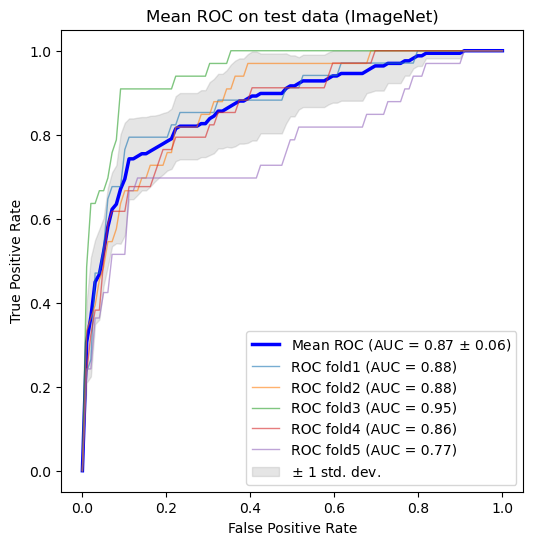

In [8]:
#database = ImageNet
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
data_generator = ImageDataGenerator(#rescale=1./255,
                                    preprocessing_function=preprocess_input)
for i in range(5): #fivefold cross-validation
    test_path = os.path.join(current_directory,"radimagenet/Workspace/Replicate_article/data/breast_splits/test_fold"+str(i+1)+".csv")
    df_test=pd.read_csv(test_path)
    test_generator = data_generator.flow_from_dataframe(
        dataframe=df_test,
        directory=current_directory,
        x_col = 'path',
        y_col = 'class',
        target_size=(image_size, image_size),
        batch_size=len(df_test),
        shuffle=False,
        seed=726,
        class_mode='categorical')
    w_path = os.path.join(current_directory,"radimagenet/WorkspaceV2/Replication_ITU_study/pretrained_ImageNet/weights/breast_data/breast-freezeall-fold"+str(i+1)+"-ImageNet-ResNet50_repli_ImgNet-256-16-1e-05.h5")
    FT_model = load_model(w_path, compile=False)

    probs = FT_model.predict(test_generator)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    ylabels = test_generator.classes
    # calculate scores
    _auc = roc_auc_score(ylabels, probs)
    # calculate roc curves
    fpr, tpr, _ = roc_curve(ylabels, probs)
    del FT_model

    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(_auc)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
ImgNet_mean_tpr = mean_tpr
mean_auc = auc(mean_fpr, mean_tpr)
ImgNet_mean_auc = mean_auc
std_auc = np.std(aucs)
std_tpr = np.std(tprs, axis=0)
#Plot:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2.5,
    alpha=1,
)
for j in range(5):
    ax.plot(
        mean_fpr,
        tprs[j],
        #color="b",
        label=r"ROC fold%i (AUC = %0.2f)" % (j+1, aucs[j]),
        lw=1,
        alpha=0.6,
    )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC on test data (ImageNet)",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

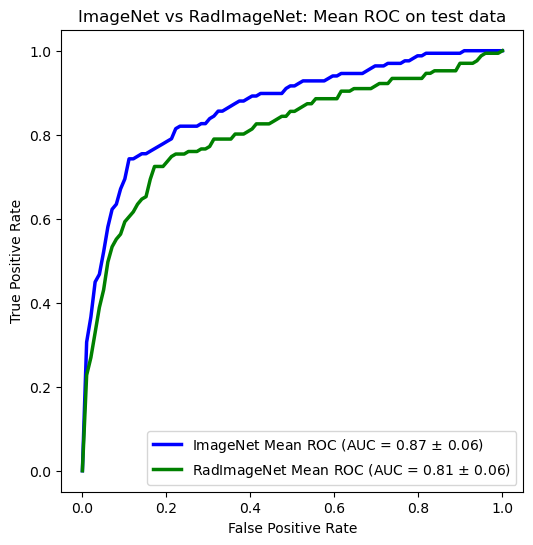

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(
    mean_fpr,
    ImgNet_mean_tpr,
    color="b",
    label=r"ImageNet Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (ImgNet_mean_auc, std_auc),
    lw=2.5,
    alpha=1,
)
ax.plot(
    mean_fpr,
    RadImgNet_mean_tpr,
    color="g",
    label=r"RadImageNet Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (RadImgNet_mean_auc, std_auc),
    lw=2.5,
    alpha=1,
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ImageNet vs RadImageNet: Mean ROC on test data",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

Kilde til plot:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

Breast: Ultrasound dataset is collected for the detection of breast cancer (Al-Dhabyani et al., 2020). https://scholar.cu.edu.eg/?q=afahmy/pages/dataset 
- Size: 780
- Classes: 2
- Image size: 256×256
- Batch size: 16

ITU Scores: Mean AUC ± std (both ×100) after fine-tuning on target datasets:
ImageNet:
- No freeze = 94.3 ± 1.7        
- Freeze = 95.1 ± 3.6
- (Mei: ImageNet models demonstrated average AUCs of 0.90±0.10)

RadImageNet:
- No freeze = 91.0 ± 5.2 
- Freeze = 89.4 ± 3.8
- (Mei: RadImageNet models demonstrated average AUCs of 0.94±0.05(P<0.001))


ITU artiklen: "Compared to Mei et al. (2022), we obtained similar AUC values for the knee and breast datasets."

Mei: Breast US showed a 4.0% gain when using Radimagenet (24 simulations)
but Mei?...
- Which model achived the best score?
- Was the during No freeze or freeze or top10-freeze? (No freeze i guess?)

Mei: The RadImageNet models demonstrated higher performance in imaging recognition and consistency
over 24 simulated tuning scenarios regardless of the sample size of the applications.
Within the 24 scenarios, unfreezing
all layers consistently achieved the best performance as compared with unfreezing partial layers and training only fully connected layers. A smaller learning rate at 0.0001 would be suggested when training all trainable parameters to potentially better capture global optimal performance.

Forskelle mellem de to studier:
- Forskellige train/val/test splits
- Resultater fra forskellige modeller (kun ResNet50 i ITU)
- Forskellig træningsstrategi... Mei = 30 epochs vs ITU = optil 300 med early stopping efter 30
- forskellig initial learning rate (ITU = 0.00001) mens den varierede for (Mei, nofreeze = 0.001 og 0.0001; top10Nofreeze = 0.001; freezed = 0.01)
- Forskellig sortering af data, f.eks. ved thyroid dataset... Mei = 349 images vs ITU = 480 images


OBS: ITU: The models were trained for a maximum of 200 epochs, with early stopping after 30 epochs of no decrease in validation loss, saving the models that achieved the lowest validation loss. This was done to prevent overfitting and ensure that the models generalize well to unseen data.... So patience=30??!